In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(10,10))
from scipy import misc

# Read Images 
img = misc.imread(r'crow2.jpg') 
#from PIL import Image
#img = Image.open("crow2.jpg")    
# Output Images 
plt.imshow(img)

AttributeError: module 'scipy.misc' has no attribute 'imread'

<Figure size 720x720 with 0 Axes>

In [4]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [2]:
import skimage.color

grayscale = skimage.color.rgb2gray(img)
img_hsv = skimage.color.rgb2hsv(img)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")

ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

ax[2].imshow(img_hsv,cmap ="hsv")
ax[2].set_title("HSV")

fig.tight_layout()
plt.show()

AttributeError: 'JpegImageFile' object has no attribute 'ndim'

In [18]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt

img = cv2.imread(r'crow.jpg')
hsv =cv2.cvtColor(img,cv2.COLOR_BGR2HSV)



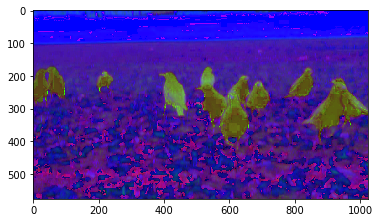

In [19]:
plt.imshow(hsv)

In [79]:

#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_gray = np.array([0,0,0], np.uint8)
upper_gray = np.array([50,50,100], np.uint8)

mask_gray = cv2.inRange(img, lower_gray, upper_gray)
img_res = cv2.bitwise_and(img, img, mask = mask_gray)

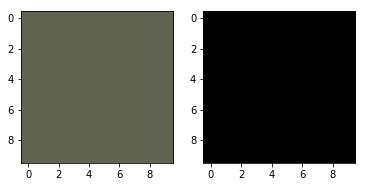

In [80]:
from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), lower_gray, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_gray, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

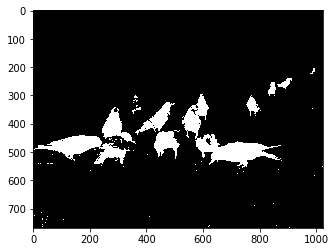

In [81]:
plt.imshow(mask_gray,cmap="gray")

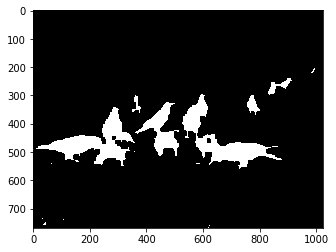

In [104]:
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(mask_gray, cv2.MORPH_CLOSE, 
                            kernel, iterations = 5) 
  
# Background area using Dialation 
bg = cv2.dilate(closing, kernel, iterations = 2) 
  
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.03* dist_transform.max(), 255, 0) 
  
plt.imshow(fg,cmap="gray")

In [105]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(fg)
unknown = cv2.subtract(bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [110]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [252, 240, 3]

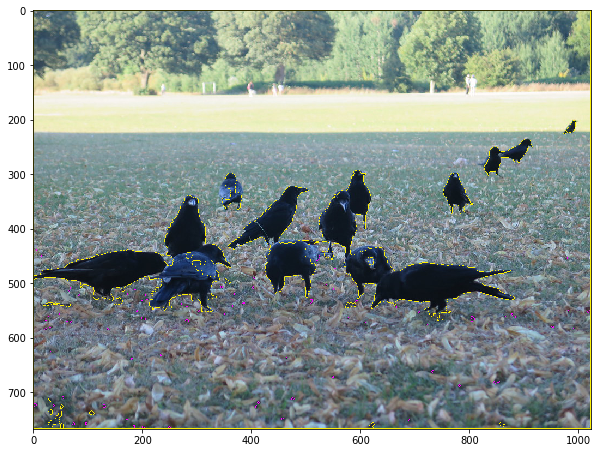

In [111]:
plt.figure(figsize=(10,10))
plt.imshow(img)